In [25]:
import requests as re
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.parse
import pickle

pd.set_option('display.max_columns', None)

In [111]:
visa_costs = pd.read_csv('GMP_GlobalVisaCostDataset_v1.0.csv')
visa_costs.head()

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion
0,Afghanistan,Albania,AFG,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,Europe,Southern Europe
1,Afghanistan,Algeria,AFG,DZA,109.0,NaN,NaN,NaN,NaN,NaN,NaN,72.336365,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,Africa,Northern Africa
2,Afghanistan,Andorra,AFG,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,Europe,Southern Europe
3,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.36364,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa
4,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,NaN,50.0,NaN,NaN,50.0,NaN,33.181820,NaN,33.181820,NaN,NaN,33.181820,NaN,Asia,Southern Asia,Americas,Latin America and the Caribbean


In [112]:
total = visa_costs.isnull().sum().sort_values(ascending=False)
percent = (visa_costs.isnull().sum()/visa_costs.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
other_perdailyincome,35122,0.909826
other_motives_visa,34909,0.904308
family_perdailyincome,33852,0.876927
family_reunification_visa,33499,0.867782
work_perdailyincome,32945,0.853431
student_perdailyincome,32695,0.846955
work_visa,32530,0.842681
student_visa,32265,0.835816
business_perdailyincome,22836,0.591560
business_visa,21663,0.561174


In [113]:
visa_costs.fillna(0, inplace=True)

In [114]:
visa_costs['sum_costs'] = visa_costs['tourist_visa']+visa_costs['student_visa']+visa_costs['business_visa']+visa_costs['work_visa']+visa_costs['family_reunification_visa']+visa_costs['transit_visa']+visa_costs['other_motives_visa']

In [115]:
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs
0,Afghanistan,Albania,AFG,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Asia,Southern Asia,Europe,Southern Europe,0.0
1,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0
2,Afghanistan,Andorra,AFG,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Asia,Southern Asia,Europe,Southern Europe,0.0
3,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.36364,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0
4,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.00000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38598,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0
38599,Zimbabwe,Viet Nam,ZWE,VNM,25.0,0.0,0.0,0.0,10.0,25.0,0.0,6.660584,0.000000,0.000000,0.00000,2.664234,6.660584,0.00000,Africa,Sub-Saharan Africa,Asia,South-eastern Asia,60.0
38600,Zimbabwe,Virgin Islands (British),ZWE,VGB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,0.0
38601,Zimbabwe,Yemen,ZWE,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Asia,Western Asia,0.0


### Get rid of rows where sum_costs = 0. No visa cost reported.

In [116]:
visa_costs = visa_costs.loc[visa_costs['sum_costs'] != 0.0]

In [117]:
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs
1,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0
3,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0
4,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0
9,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0
11,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38594,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0
38595,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0
38596,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0
38598,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0


### Went from 38603 rows to 15593 rows

Text(0, 0.5, 'Frequency')

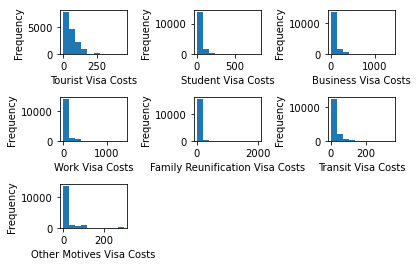

In [118]:
fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=1)

visa1 = fig.add_subplot(3,3,1)
visa2 = fig.add_subplot(3,3,2)
visa3 = fig.add_subplot(3,3,3)
visa4 = fig.add_subplot(3,3,4)
visa5 = fig.add_subplot(3,3,5)
visa6 = fig.add_subplot(3,3,6)
visa7 = fig.add_subplot(3,3,7)

n, bins, patches = visa1.hist(visa_costs['tourist_visa'])
visa1.set_xlabel('Tourist Visa Costs')
visa1.set_ylabel('Frequency')

n, bins, patches = visa2.hist(visa_costs['student_visa'])
visa2.set_xlabel('Student Visa Costs')
visa2.set_ylabel('Frequency')

n, bins, patches = visa3.hist(visa_costs['business_visa'])
visa3.set_xlabel('Business Visa Costs')
visa3.set_ylabel('Frequency')

n, bins, patches = visa4.hist(visa_costs['work_visa'])
visa4.set_xlabel('Work Visa Costs')
visa4.set_ylabel('Frequency')

n, bins, patches = visa5.hist(visa_costs['family_reunification_visa'])
visa5.set_xlabel('Family Reunification Visa Costs')
visa5.set_ylabel('Frequency')

n, bins, patches = visa6.hist(visa_costs['transit_visa'])
visa6.set_xlabel('Transit Visa Costs')
visa6.set_ylabel('Frequency')

n, bins, patches = visa7.hist(visa_costs['other_motives_visa'])
visa7.set_xlabel('Other Motives Visa Costs')
visa7.set_ylabel('Frequency')

### Create column for sum of all visas per daily income

In [119]:
visa_costs['sum_perdailyincome'] = visa_costs['tourist_perdailyincome']+visa_costs['student_perdailyincome']+visa_costs['business_perdailyincome']+visa_costs['work_perdailyincome']+visa_costs['family_perdailyincome']+visa_costs['transit_perdailyincome']+visa_costs['other_perdailyincome']

<ipython-input-119-2dd76f650a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visa_costs['sum_perdailyincome'] = visa_costs['tourist_perdailyincome']+visa_costs['student_perdailyincome']+visa_costs['business_perdailyincome']+visa_costs['work_perdailyincome']+visa_costs['family_perdailyincome']+visa_costs['transit_perdailyincome']+visa_costs['other_perdailyincome']


In [120]:
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome
1,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365
3,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107
4,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460
9,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273
11,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38594,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248
38595,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051
38596,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336
38598,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701


In [121]:
visa_costs.sort_values(by=['sum_perdailyincome'], ascending=False)

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome
182,Afghanistan,Ukraine,AFG,UKR,85.0,800.0,100.0,800.0,800.0,100.0,0.0,56.409092,530.909119,66.363640,530.909119,530.909119,66.36364,0.0,Asia,Southern Asia,Europe,Eastern Europe,2685.0,1781.863728
5639,Burundi,Turks and Caicos Islands,BDI,TCA,250.0,400.0,600.0,0.0,0.0,0.0,0.0,325.892853,521.428589,782.142883,0.000000,0.000000,0.00000,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1250.0,1629.464325
5511,Burundi,Ecuador,BDI,ECU,0.0,80.0,400.0,400.0,200.0,0.0,0.0,0.000000,104.285713,521.428589,521.428589,260.714294,0.00000,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1080.0,1407.857185
5645,Burundi,United States of America,BDI,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,208.571426,208.571426,208.571426,247.678574,423.660706,0.00000,0.0,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,1297.053558
25331,Niger,Turks and Caicos Islands,NER,TCA,250.0,400.0,600.0,0.0,0.0,0.0,0.0,253.472229,405.555572,608.333313,0.000000,0.000000,0.00000,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1250.0,1267.361114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13374,Gibraltar,Mexico,GIB,MEX,0.0,36.0,36.0,246.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,Europe,Southern Europe,Americas,Latin America and the Caribbean,318.0,0.000000
13366,Gibraltar,Malawi,GIB,MWI,75.0,0.0,75.0,0.0,0.0,50.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,Europe,Southern Europe,Africa,Sub-Saharan Africa,200.0,0.000000
13358,Gibraltar,Lesotho,GIB,LSO,150.0,150.0,150.0,0.0,0.0,0.0,300.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,Europe,Southern Europe,Africa,Sub-Saharan Africa,750.0,0.000000
13355,Gibraltar,Lao People's Democratic Republic,GIB,LAO,35.0,0.0,0.0,0.0,0.0,35.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,Europe,Southern Europe,Asia,South-eastern Asia,70.0,0.000000


### Get rid of rows where sum_perdailyincome == 0

In [122]:
visa_costs = visa_costs.loc[visa_costs['sum_perdailyincome'] != 0.0]
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome
1,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365
3,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107
4,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460
9,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273
11,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38594,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248
38595,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051
38596,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336
38598,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701


### Went from 15593 to 14470 rows

### Add lat and lon columns for source and target countries

In [124]:
country_latlon = pd.read_csv('countries.csv')
country_latlon = country_latlon[['name', 'latitude', 'longitude']]
country_latlon.rename(columns={'name':'source'},inplace=True)

### Some of the country names don't match. Update names in countries df to match country names in visa_costs
### Got the below list of non matching names from trying to merge before

In [58]:
visa_costs[visa_costs['source_lat'].isnull()].source.unique()

array(['Bolivia (Plurinational State of)', 'Brunei Darussalam',
       'Cabo Verde', 'Congo', 'Congo (Democratic Republic of the)',
       'Czechia', "Côte d'Ivoire", 'Eswatini',
       'Iran (Islamic Republic of)', 'Korea (Republic of)',
       "Lao People's Democratic Republic", 'Macao',
       'Macedonia (the former Yugoslav Republic of)',
       'Micronesia (Federated States of)', 'Moldova (Republic of)',
       'Myanmar', 'Palestine, State of', 'Russian Federation',
       'Sao Tome and Principe', 'Tanzania, United Republic of',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Viet Nam'], dtype=object)

In [110]:
visa_costs.rename(columns={'latitude':'target_lat', 'longitude':'target_lon'},inplace=True)
visa_costs[visa_costs['target_lat'].isnull()].target.unique()

array(["Korea (Democratic People's Republic of)",
       'Venezuela (Bolivarian Republic of)', 'Virgin Islands (British)'],
      dtype=object)

In [125]:
country_latlon['source'].mask(country_latlon['source'] == 'Bolivia', 'Bolivia (Plurinational State of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Brunei', 'Brunei Darussalam', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Cape Verde', 'Cabo Verde', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Congo [Republic]', 'Congo', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Congo [DRC]', 'Congo (Democratic Republic of the)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Czech Republic', 'Czechia', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == "C?te d'Ivoire", "Côte d'Ivoire", inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Swaziland', 'Eswatini', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Iran','Iran (Islamic Republic of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'South Korea', 'Korea (Republic of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Laos', "Lao People's Democratic Republic", inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Macau', 'Macao', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Macedonia [FYROM]', 'Macedonia (the former Yugoslav Republic of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Micronesia','Micronesia (Federated States of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Moldova', 'Moldova (Republic of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Myanmar [Burma]', 'Myanmar', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Palestinian Territories','Palestine, State of', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Russia', 'Russian Federation', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'S?o Tom? and Pr?ncipe', 'Sao Tome and Principe', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Tanzania', 'Tanzania, United Republic of', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'United Kingdom', 'United Kingdom of Great Britain and Northern Ireland', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'United States', 'United States of America', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Vietnam', 'Viet Nam', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'British Virgin Islands', 'Virgin Islands (British)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'Venezuela', 'Venezuela (Bolivarian Republic of)', inplace=True)
country_latlon['source'].mask(country_latlon['source'] == 'North Korea', "Korea (Democratic People's Republic of)", inplace=True)

### Now merge to get lat and lons of source countries

In [126]:
visa_costs = visa_costs.merge(country_latlon, how='left', on='source')
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome,latitude,longitude
0,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365,33.939110,67.709953
1,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107,33.939110,67.709953
2,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460,33.939110,67.709953
3,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273,33.939110,67.709953
4,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248,-19.015438,29.154857
14466,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051,-19.015438,29.154857
14467,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336,-19.015438,29.154857
14468,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701,-19.015438,29.154857


In [127]:
visa_costs.rename(columns={'latitude':'source_lat', 'longitude':'source_lon'},inplace=True)
visa_costs[visa_costs['source_lat'].isnull()].source.unique()

array([], dtype=object)

### Now add lat and lon columns for target countries

In [129]:
country_latlon.rename(columns={'source':'target'},inplace=True)

In [130]:
visa_costs = visa_costs.merge(country_latlon, how='left', on='target')

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome,source_lat,source_lon,latitude,longitude
0,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365,33.939110,67.709953,28.033886,1.659626
1,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107,33.939110,67.709953,-11.202692,17.873887
2,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460,33.939110,67.709953,17.060816,-61.796428
3,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273,33.939110,67.709953,40.143105,47.576927
4,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550,33.939110,67.709953,25.930414,50.637772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248,-19.015438,29.154857,37.090240,-95.712891
14466,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051,-19.015438,29.154857,-32.522779,-55.765835
14467,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336,-19.015438,29.154857,41.377491,64.585262
14468,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701,-19.015438,29.154857,6.423750,-66.589730


In [131]:
visa_costs.rename(columns={'latitude':'target_lat', 'longitude':'target_lon'},inplace=True)
visa_costs[visa_costs['target_lat'].isnull()].target.unique()

array([], dtype=object)

In [132]:
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome,source_lat,source_lon,target_lat,target_lon
0,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365,33.939110,67.709953,28.033886,1.659626
1,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107,33.939110,67.709953,-11.202692,17.873887
2,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460,33.939110,67.709953,17.060816,-61.796428
3,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273,33.939110,67.709953,40.143105,47.576927
4,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550,33.939110,67.709953,25.930414,50.637772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248,-19.015438,29.154857,37.090240,-95.712891
14466,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051,-19.015438,29.154857,-32.522779,-55.765835
14467,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336,-19.015438,29.154857,41.377491,64.585262
14468,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701,-19.015438,29.154857,6.423750,-66.589730


### Add lat and lon columns for source and target regions

In [53]:
visa_costs.source_region.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [134]:
regions_latlon = pd.DataFrame([['Asia', 34.0479, 100.6179], 
                               ['Europe', 54.5260, 15.2551], 
                               ['Africa', -8.7832, 34.5085], 
                               ['Americas', 54.5260, -105.2551], 
                               ['Oceania', -22.7359, 140.0188]], columns=['region', 'latitude', 'longitude'])
regions_latlon

,region,latitude,longitude
0,Asia,34.0479,100.6179
1,Europe,54.5260,15.2551
2,Africa,-8.7832,34.5085
3,Americas,54.5260,-105.2551
4,Oceania,-22.7359,140.0188


In [135]:
regions_latlon.rename(columns={'region':'source_region'},inplace=True)
visa_costs = visa_costs.merge(regions_latlon, how='left', on='source_region')

In [136]:
visa_costs.rename(columns={'latitude':'source_region_lat', 'longitude':'source_region_lon'},inplace=True)
visa_costs[visa_costs['source_region_lat'].isnull()].source_region.unique()

array([], dtype=object)

### Now adding target regions lat lon

In [138]:
regions_latlon.rename(columns={'source_region':'target_region'},inplace=True)
visa_costs = visa_costs.merge(regions_latlon, how='left', on='target_region')

In [139]:
visa_costs.rename(columns={'latitude':'target_region_lat', 'longitude':'target_region_lon'},inplace=True)
visa_costs[visa_costs['target_region_lat'].isnull()].target_region.unique()

array([], dtype=object)

In [140]:
visa_costs

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome,source_lat,source_lon,target_lat,target_lon,source_region_lat,source_region_lon,target_region_lat,target_region_lon
0,Afghanistan,Algeria,AFG,DZA,109.0,0.0,0.0,0.0,0.0,0.0,0.0,72.336365,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Africa,Northern Africa,109.0,72.336365,33.939110,67.709953,28.033886,1.659626,34.0479,100.6179,-8.7832,34.5085
1,Afghanistan,Angola,AFG,AGO,60.0,60.0,60.0,100.0,60.0,30.0,100.0,39.818184,39.818184,39.818184,66.363640,39.818184,19.909092,66.36364,Asia,Southern Asia,Africa,Sub-Saharan Africa,470.0,311.909107,33.939110,67.709953,-11.202692,17.873887,34.0479,100.6179,-8.7832,34.5085
2,Afghanistan,Antigua and Barbuda,AFG,ATG,50.0,0.0,50.0,0.0,0.0,50.0,0.0,33.181820,0.000000,33.181820,0.000000,0.000000,33.181820,0.00000,Asia,Southern Asia,Americas,Latin America and the Caribbean,150.0,99.545460,33.939110,67.709953,17.060816,-61.796428,34.0479,100.6179,54.5260,-105.2551
3,Afghanistan,Azerbaijan,AFG,AZE,23.0,0.0,23.0,0.0,0.0,0.0,0.0,15.263637,0.000000,15.263637,0.000000,0.000000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,46.0,30.527273,33.939110,67.709953,40.143105,47.576927,34.0479,100.6179,34.0479,100.6179
4,Afghanistan,Bahrain,AFG,BHR,29.0,0.0,29.0,100.0,22.0,0.0,0.0,19.245455,0.000000,19.245455,66.363640,14.600000,0.000000,0.00000,Asia,Southern Asia,Asia,Western Asia,180.0,119.454550,33.939110,67.709953,25.930414,50.637772,34.0479,100.6179,34.0479,100.6179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Zimbabwe,United States of America,ZWE,USA,160.0,160.0,160.0,190.0,325.0,0.0,0.0,42.627739,42.627739,42.627739,50.620438,86.587593,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Northern America,995.0,265.091248,-19.015438,29.154857,37.090240,-95.712891,-8.7832,34.5085,54.5260,-105.2551
14466,Zimbabwe,Uruguay,ZWE,URY,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.989051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,45.0,11.989051,-19.015438,29.154857,-32.522779,-55.765835,-8.7832,34.5085,54.5260,-105.2551
14467,Zimbabwe,Uzbekistan,ZWE,UZB,60.0,0.0,0.0,0.0,0.0,40.0,0.0,15.985401,0.000000,0.000000,0.000000,0.000000,10.656935,0.00000,Africa,Sub-Saharan Africa,Asia,Central Asia,100.0,26.642336,-19.015438,29.154857,41.377491,64.585262,-8.7832,34.5085,34.0479,100.6179
14468,Zimbabwe,Venezuela (Bolivarian Republic of),ZWE,VEN,30.0,0.0,0.0,0.0,0.0,0.0,0.0,7.992701,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,30.0,7.992701,-19.015438,29.154857,6.423750,-66.589730,-8.7832,34.5085,54.5260,-105.2551


In [141]:
visa_costs.to_csv('GlobalVisaCostDataset_latslons.csv')

In [123]:
# What are some of the most expensive visas?
# What are some of the most cheapest visas?
# What visas produce the most per daily income? The least?
# Which visas have most per daily income per sender country?

In [143]:
visa_costs.sort_values(by=['tourist_visa'], ascending=False).head(25)

,source,target,source_iso3,target_iso3,tourist_visa,student_visa,business_visa,work_visa,family_reunification_visa,transit_visa,other_motives_visa,tourist_perdailyincome,student_perdailyincome,business_perdailyincome,work_perdailyincome,family_perdailyincome,transit_perdailyincome,other_perdailyincome,source_region,source_subregion,target_region,target_subregion,sum_costs,sum_perdailyincome,source_lat,source_lon,target_lat,target_lon,source_region_lat,source_region_lon,target_region_lat,target_region_lon
6673,Kenya,Ecuador,KEN,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,114.062500,32.951389,114.062500,139.409729,63.368057,0.0,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1830.0,463.854176,-0.023559,37.906193,-1.831239,-78.183406,-8.7832,34.5085,54.5260,-105.2551
5450,Haiti,Ecuador,HTI,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,216.118423,62.434212,216.118423,264.144745,120.065796,0.0,0.0,Americas,Latin America and the Caribbean,Americas,Latin America and the Caribbean,1830.0,878.881600,18.971187,-72.285215,-1.831239,-78.183406,54.5260,-105.2551,54.5260,-105.2551
4375,Ethiopia,Ecuador,ETH,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,221.959473,64.121628,221.959473,271.283783,123.310814,0.0,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1830.0,902.635170,9.145000,40.489673,-1.831239,-78.183406,-8.7832,34.5085,54.5260,-105.2551
21,Afghanistan,Ecuador,AFG,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,298.636383,86.272728,298.636383,365.000000,165.909088,0.0,0.0,Asia,Southern Asia,Americas,Latin America and the Caribbean,1830.0,1214.454582,33.939110,67.709953,-1.831239,-78.183406,34.0479,100.6179,54.5260,-105.2551
9289,Nepal,Ecuador,NPL,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,193.235306,55.823532,193.235306,236.176483,107.352943,0.0,0.0,Asia,Southern Asia,Americas,Latin America and the Caribbean,1830.0,785.823570,28.394857,84.124008,-1.831239,-78.183406,34.0479,100.6179,54.5260,-105.2551
11465,Senegal,Ecuador,SEN,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,128.320312,37.070312,128.320312,156.835938,71.289062,0.0,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1830.0,521.835938,14.497401,-14.452362,-1.831239,-78.183406,-8.7832,34.5085,54.5260,-105.2551
9910,Pakistan,Ecuador,PAK,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,109.500000,31.633333,109.500000,133.833328,60.833332,0.0,0.0,Asia,Southern Asia,Americas,Latin America and the Caribbean,1830.0,445.299993,30.375321,69.345116,-1.831239,-78.183406,34.0479,100.6179,54.5260,-105.2551
982,Bangladesh,Ecuador,BGD,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,108.059212,31.217106,108.059212,132.072372,60.032898,0.0,0.0,Asia,Southern Asia,Americas,Latin America and the Caribbean,1830.0,439.440800,23.684994,90.356331,-1.831239,-78.183406,34.0479,100.6179,54.5260,-105.2551
9681,Nigeria,Ecuador,NGA,ECU,450.0,130.0,450.0,550.0,250.0,0.0,0.0,78.214287,22.595238,78.214287,95.595238,43.452381,0.0,0.0,Africa,Sub-Saharan Africa,Americas,Latin America and the Caribbean,1830.0,318.071430,9.081999,8.675277,-1.831239,-78.183406,-8.7832,34.5085,54.5260,-105.2551
5844,India,Nigeria,IND,NGA,253.0,253.0,0.0,253.0,0.0,0.0,0.0,50.461750,50.461750,0.000000,50.461750,0.000000,0.0,0.0,Asia,Southern Asia,Africa,Sub-Saharan Africa,759.0,151.385250,20.593684,78.962880,9.081999,8.675277,34.0479,100.6179,-8.7832,34.5085
